In [1]:
# Comenzamos importando las librerías/paquetes necesarios

import numpy as np

import pandas as pd

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

import matplotlib.pyplot as plt

In [2]:
# Simularemos a mano un modelo VAR(1) con 2 variables, restricción b21 = 0. 
# Definimos a las variables estructurales como y, z, y a las estándar como 1, 2
# Definimos a su vez el valor de los parámetros

vare1t = 1
vare2t = 1
a11 = a22 = 0.7
a12 = a21 = 0.2
cove1e2 = 0.8
b21 = 0

# Calculamos el valor de los parámetros relevantes

sigmaz = vare2t
b12 = -cove1e2/sigmaz
sigmay = vare1t - b12**2*sigmaz

# Definimos un shock de 1 unidad de epsilon_y.
# Dado un VAR en forma estandar con a10 = a20 = 0, el mismo será: xt = A1xt-1 + et
# Se calcularán las funciones impulso-respuesta, que miden el efecto de un shock sobre las variables estructurales
# yt = ybar + sum_i(A1_i)*[1, -b12; 0, 1]
# Pero dados a10 = a20 = 0, ybar = 0 (vector nulo). Por lo tanto, yt = sum_i(A1_i)*[1, -b12; 0, 1]
# Definimos un shock unitario en las variables, comenzando con sigmay

A1 = np.array([[a11,a12],[a21,a22]])
A1

mat1 = (1/(1-b12*b21))*np.array([[1,-b12],[-b21,1]])
error1 = np.array([1,0])
error1 = np.transpose(error1)
mat2 = np.dot(mat1,error1)

vec = np.zeros((2,30))

# Definimos un loop para obtener los primeros 50 valores de la función impulso respuesto

for i in range(30):
    if i == 0:
        vec[:,i] = np.dot(np.eye(2),mat2)
    else:
        vec[:,i] = np.dot(A1**i,mat2)

    

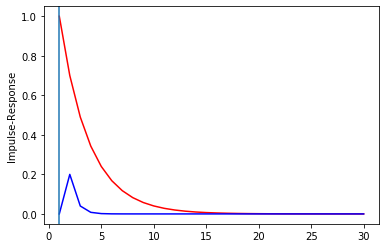

In [3]:
# Procederemos a hacer los gráficos de las funciones impulso respuesta

tt = np.linspace(1,30,30)
plt.plot(tt[0:30],vec[0,0:30],'r',tt[0:30],vec[1,0:30],'b')
plt.ylabel('Impulse-Response')
plt.axvline(x=1)
plt.show()

In [4]:
# Hacemos lo mismo, pero para un shock unitario en sigmaz

error2 = np.array([0,1])
error2 = np.transpose(error2)
mat3 = np.dot(mat1,error2)

vec2 = np.zeros((2,30))

for i in range(30):
    if i == 0:
        vec2[:,i] = np.dot(np.eye(2),mat3)
    else:
        vec2[:,i] = np.dot(A1**i,mat3)

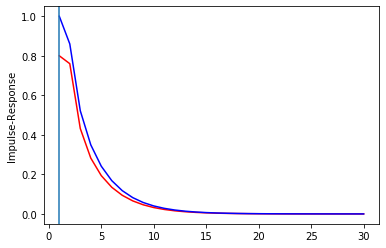

In [5]:
plt.plot(tt,vec2[0,:],'r',tt,vec2[1,:],'b')
plt.ylabel('Impulse-Response')
plt.axvline(x=1)
plt.show()

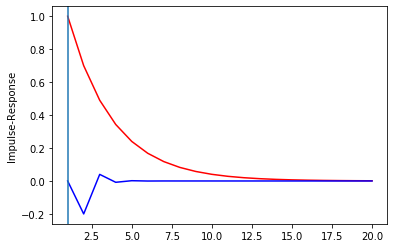

In [6]:
# Ahora efectuamos el mismo procedimiento pero para distintos valores de los parámetros

A2 = np.array([[0.7,-0.2],[-0.2,0.7]])
vec3 = np.zeros((2,20))

for i in range(20):
    if i == 0:
        vec3[:,i] = np.dot(np.eye(2),mat2)
    else:
        vec3[:,i] = np.dot(A2**i,mat2)
plt.plot(tt[0:20],vec3[0,:],'r',tt[0:20],vec3[1,:],'b')
plt.ylabel('Impulse-Response')
plt.axvline(x=1)
plt.show()

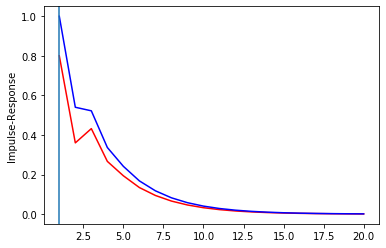

In [7]:
vec4 = np.zeros((2,20))

for i in range(20):
    if i == 0:
        vec4[:,i] = np.dot(np.eye(2),mat3)
    else:
        vec4[:,i] = np.dot(A2**i,mat3)
plt.plot(tt[0:20],vec4[0,:],'r',tt[0:20],vec4[1,:],'b')
plt.ylabel('Impulse-Response')
plt.axvline(x=1)
plt.show()

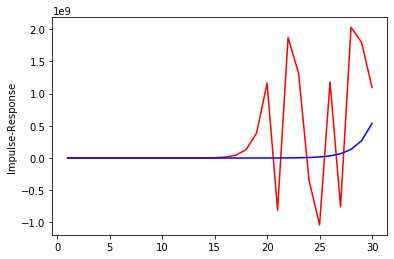

In [8]:
# Qué sucede en el caso en que no se cumple la condición de estacionariedad? Lo veremos a continuación

A3 = np.array([[3,1],[2,2]])

vec5 = np.zeros((2,30))

for i in range(30):
    if i == 0:
        vec5[:,i] = np.dot(np.eye(2),mat2)
    else:
        vec5[:,i] = np.dot(A3**i,mat2)

plt.plot(tt,vec5[0,:],'r',tt,vec5[1,:],'b')
plt.ylabel('Impulse-Response')
plt.show()

# Los shocks son permanentes y no estacionarios

In [9]:
# Trabajaremos ahora con las series del S&P 500 y el term spread de USA
# Las series son trimestrales, y van de Q1 1985 a Q4 2017 
# El term spread se define como la diferencia entre la tasa de los treasuries a 10 años y la tasa de 1 año

# En una primera instancia, importamos los datos de Excel

main_data = pd.read_excel('../Data/Data1.xlsx')
main_data.tail()

,Data,Term Spread,GDP,S&P 500
127,2016-10-01,1.62,16851.420,2278.870117
128,2017-01-01,1.47,16903.240,2384.199951
129,2017-04-01,0.99,17031.085,2470.300049
130,2017-07-01,0.92,17163.894,2575.260010
131,2017-10-01,0.70,17271.702,2823.810059


In [10]:
TermSpread = main_data.iloc[:,1]
SP500 = main_data.iloc[:,3]
TermSpread.head()

0    2.00
1    2.36
2    2.30
3    1.59
4    0.75
Name: Term Spread, dtype: float64

In [11]:
# En una primera instancia, efectuamos el test ADF para comprobar si las series de tiempo consideradas son estacionarias

sm.tsa.stattools.adfuller(SP500, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(0.7839642144666791,
 0.9913728609262202,
 3,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 1351.3165170659827)

In [12]:
sm.tsa.stattools.adfuller(TermSpread, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-3.5388112122556707,
 0.007044524138845924,
 3,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 100.47197237624039)

In [13]:
# Dado que la serie del S&P es no estacionaria, utilizaremos el retorno del S&P 500.

SP500t = SP500.iloc[0:-6]
SP500t1 = SP500.iloc[1:-5]
aux = np.subtract(SP500t1,SP500t)
SP500Gr = np.divide(aux,SP500t)
# Efectuamos el test ADF

SP500Gr.head()

sm.tsa.stattools.adfuller(SP500Gr, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-9.971907848157649,
 2.228887256127023e-17,
 0,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 -288.37017665402124)

In [14]:
# Transformamos la serie Term Spread, dado que se ha perdido una observación

TermSpread1 = TermSpread[1:-5]

# Definimos los datos a utilizar en el VAR

Final_Data = pd.concat([TermSpread1,SP500Gr], axis=1)
Final_Data.columns = [ 'TermSpread1', 'SP500Gr' ]

# Finalmente, comenzamos a definir un modelo VAR para estos datos

model = VAR(Final_Data)

# Estimamos un VAR(1) para los datos utilizados

results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Jul, 2019
Time:                     21:34:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.05314
Nobs:                     125.000    HQIC:                  -7.13375
Log likelihood:           100.572    FPE:                0.000754934
AIC:                     -7.18890    Det(Omega_mle):     0.000719961
--------------------------------------------------------------------
Results for equation TermSpread1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.110030         0.063544            1.732           0.083
L1.TermSpread1         0.922914         0.034127           27.044           0.000
L1.SP500Gr            -0.257385         0.515545  

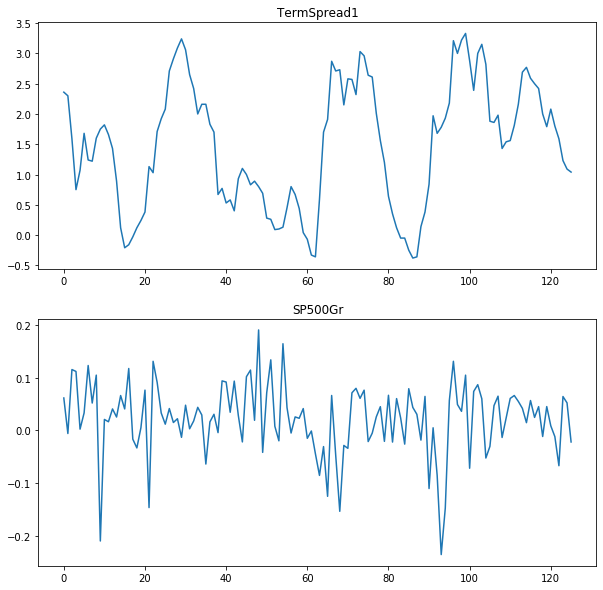

In [15]:
results.plot();

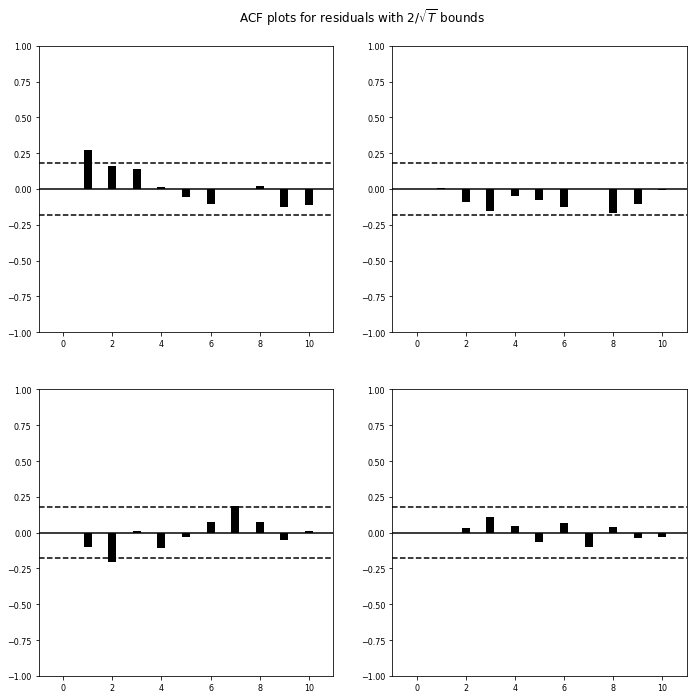

In [16]:
results.plot_acorr();

In [17]:
results2 = model.fit(maxlags=25, ic='fpe')
results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Jul, 2019
Time:                     21:34:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.96818
Nobs:                     123.000    HQIC:                  -7.15825
Log likelihood:           113.169    FPE:                0.000683682
AIC:                     -7.28826    Det(Omega_mle):     0.000612037
--------------------------------------------------------------------
Results for equation TermSpread1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.197928         0.064454            3.071           0.002
L1.TermSpread1         1.142643         0.090010           12.695           0.000
L1.SP500Gr             0.008108         0.492051  

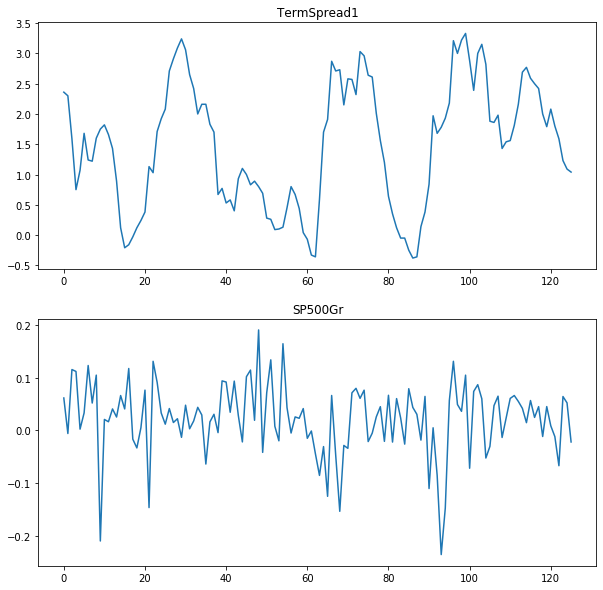

In [18]:
results2.plot();

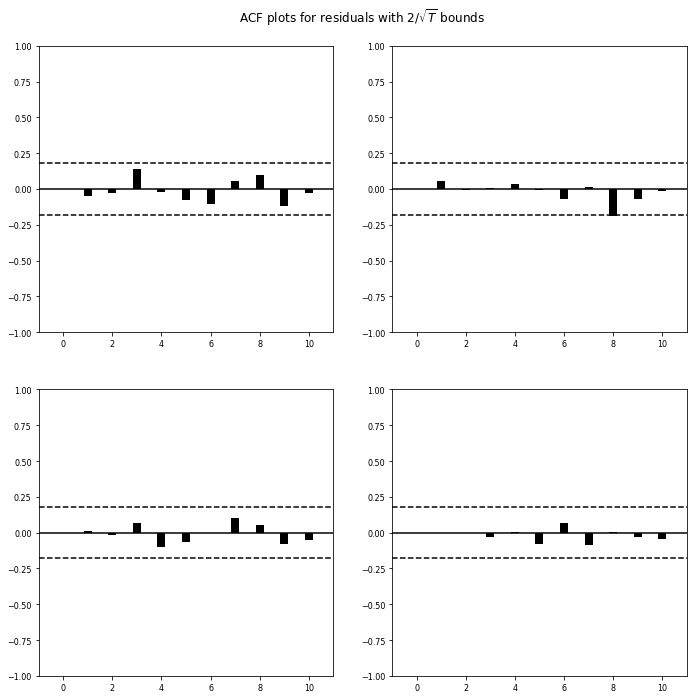

In [19]:
results2.plot_acorr();

In [20]:
# A continuación, efectuamos el pronóstico utilizando ambos modelos, y comparamos el MSE

lag_order = 5
results.forecast(Final_Data.values[-lag_order:], 5)

array([[1.07548015, 0.01835209],
       [1.09788297, 0.02240553],
       [1.11751556, 0.0227704 ],
       [1.13554085, 0.02276206],
       [1.1521788 , 0.02271905]])

In [21]:
lag_order2 = 5
results2.forecast(Final_Data.values[-lag_order2:], 5)

array([[1.00832723, 0.02761348],
       [1.04106247, 0.02475012],
       [1.1271932 , 0.01590552],
       [1.188683  , 0.01772375],
       [1.25092278, 0.01561956]])

In [22]:
# Los valores reales de SP500Gr y TermSpread son:

real = np.array(Final_Data[-5:])
forecast1 = results.forecast(Final_Data.values[-lag_order:], 5)
forecast2 = results2.forecast(Final_Data.values[-lag_order2:], 5)

# Luego comparamos el MSE de ambos pronósticos

In [23]:
np.linalg.norm(real - forecast1)

0.8988312680702483

In [24]:
np.linalg.norm(real - forecast2)

1.0038825191979062

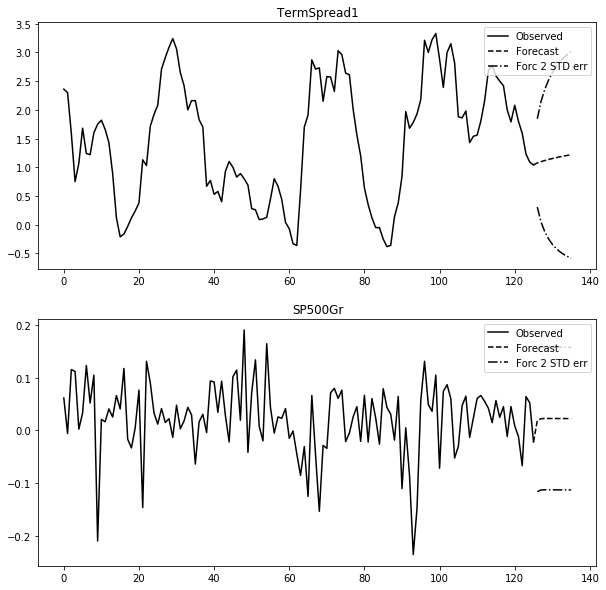

In [25]:
# Vemos los gráficos de cada pronóstico

results.plot_forecast(10);

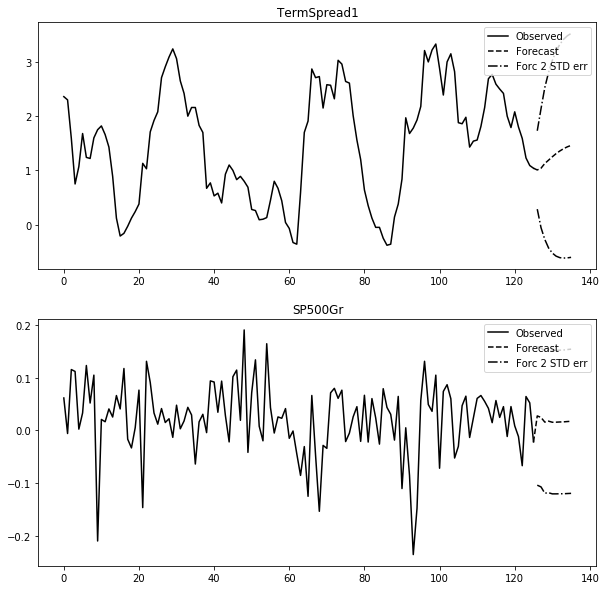

In [26]:
results2.plot_forecast(10);

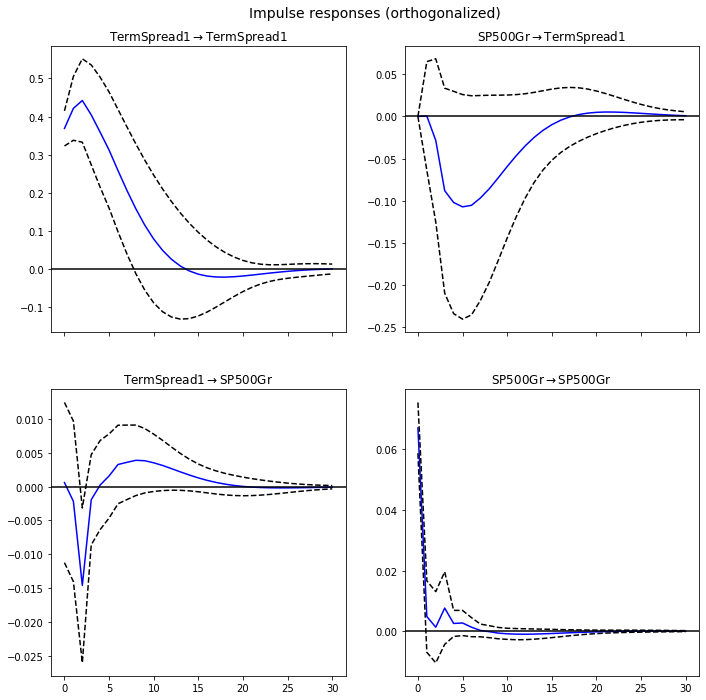

In [27]:
# Realizamos el análisis de impulso-respuesta del modelo con 2 rezagos para 30 períodos

irf = results2.irf(30)
irf.plot(orth=True);

In [28]:
# Efectuamos el test de causalidad de Granger, para corroborar que el ordenamiento de las variables es el correcto

gcaus = results2.test_causality('SP500Gr', ['TermSpread1'], kind='f')
gcaus.summary()

Test statistic,Critical value,p-value,df
2.649,2.644,0.050,"(3, 232)"


In [29]:
# Descomposición de la varianza
# El objetivo es ver que porcentaje de la varianza es explicada por el propio shock y cual por el shock de la restante variable

fevd = results2.fevd(5)
fevd.summary()

FEVD for TermSpread1
     TermSpread1   SP500Gr
0       1.000000  0.000000
1       0.999999  0.000001
2       0.998406  0.001594
3       0.987374  0.012626
4       0.976767  0.023233

FEVD for SP500Gr
     TermSpread1   SP500Gr
0       0.000078  0.999922
1       0.001133  0.998867
2       0.046132  0.953868
3       0.046325  0.953675
4       0.046272  0.953728




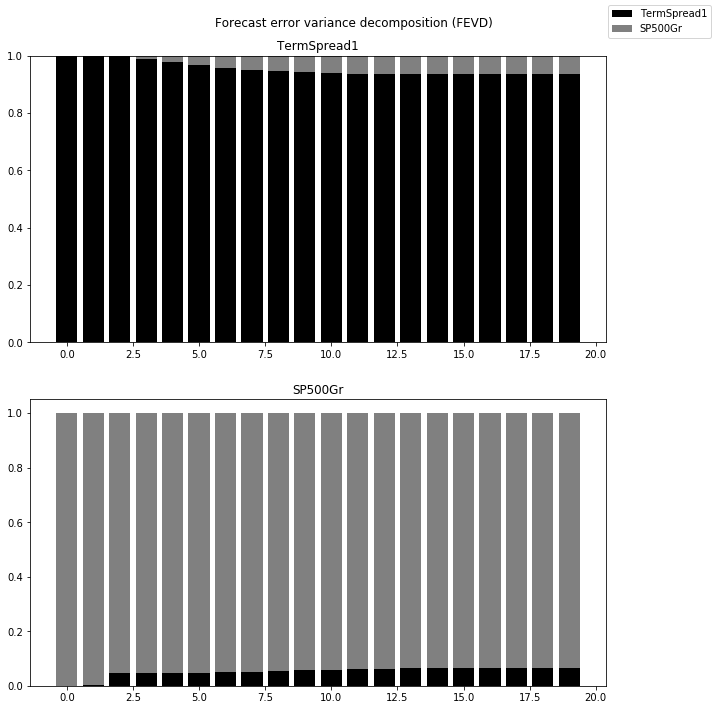

In [30]:
results2.fevd(20).plot();

In [31]:
testr = results2.test_whiteness()
testr.summary()

Test statistic,Critical value,p-value,df
22.55,41.34,0.755,28


In [32]:
testr2 = results.test_whiteness()
testr2.summary()

Test statistic,Critical value,p-value,df
49.69,51.00,0.064,36


In [33]:
results.resid_acov()

array([[[ 1.50255667e-01, -2.48387606e-03],
        [-2.48387606e-03,  4.60539803e-03]],

       [[ 4.13746156e-02,  1.71388425e-04],
        [-2.66182849e-03, -4.57031651e-06]]])